In [1]:
import os
import sys
import numpy as np
import tensorflow

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Loading dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizing images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encoding labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [2]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop

model = models.Sequential()

# First Convolutional Layer Set
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same"))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Second Convolutional Layer Set
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Fully Connected Layer
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compiling the model
optimizer = RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_test, y_test),
    shuffle=True
)


Epoch 1/20
1563/1563 [==============================] - 12s 5ms/step - loss: 1.8583 - accuracy: 0.3232 - val_loss: 1.5800 - val_accuracy: 0.4303
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5365 - accuracy: 0.4394 - val_loss: 1.3753 - val_accuracy: 0.5078
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3975 - accuracy: 0.4971 - val_loss: 1.3099 - val_accuracy: 0.5238
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3068 - accuracy: 0.5311 - val_loss: 1.2669 - val_accuracy: 0.5499
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2367 - accuracy: 0.5610 - val_loss: 1.1841 - val_accuracy: 0.5760
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1786 - accuracy: 0.5813 - val_loss: 1.0913 - val_accuracy: 0.6121
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1282 - accuracy: 0.6010 - val_loss: 1.0739 - val_accuracy

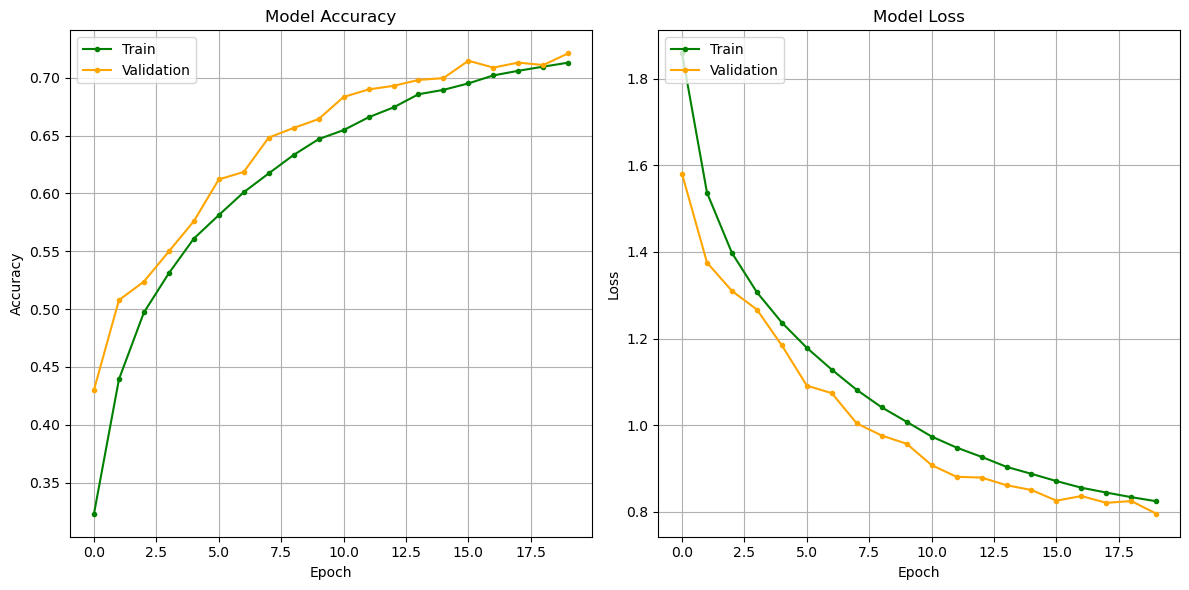

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='.', linestyle='-', color='green')
plt.plot(history.history['val_accuracy'], marker='.', linestyle='-', color='orange')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='.', linestyle='-', color='green')
plt.plot(history.history['val_loss'], marker='.', linestyle='-', color='orange')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()